In [73]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import glob
import matplotlib.dates as mdates
import datetime
import dask.array as da

import cartopy.crs as ccrs
import cartopy
import matplotlib.gridspec as gridspec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [74]:
from glob import glob

In [75]:
trackfiles = glob("../data/track_data/*")

In [76]:
trackfiles.pop()

'../data/track_data/csvs'

In [77]:
trackfiles
trackfile_names = ["Maria 2017", "Irene 2011", "Hermine 2016", "Sandy 2012", "Jose 2017"]

In [78]:
df = pd.read_csv(trackfiles[0], skiprows=1)

In [79]:
lats, lons = df.columns[4], df.columns[5]

In [80]:
df.columns[0]

'20170916'

In [81]:
lat_plots = [float(df[lats][i][:-1]) for i in range(len(df[df.columns[0]]))]
lon_plots = [-float(df[lons][i][:-1]) for i in range(len(df[df.columns[0]]))]

In [82]:
trkfiles = glob("../data/track_data/csvs/*")
trkfiles_names = ["Fay 2020", "Isaias 2020", "Earl 2010", "Arthur 2014", "Teddy 2020"]

In [83]:
df = pd.read_csv(trkfiles[0])
df['LAT'].values, df['LON'].values

(array([28.2 , 28.2 , 28.2 , 28.2 , 28.2 , 28.18, 28.2 , 28.25, 28.4 ,
        28.65, 29.  , 29.42, 29.9 , 30.41, 30.9 , 31.28, 31.6 , 31.91,
        32.2 , 32.51, 32.8 , 33.09, 33.3 , 33.34, 33.3 , 33.3 , 33.3 ,
        33.3 , 33.3 , 33.27, 33.3 , 33.49, 33.7 , 33.81, 33.9 , 34.01,
        34.1 , 34.02, 34.1 , 34.72, 35.4 , 35.64, 35.9 , 36.33, 36.8 ,
        37.17, 37.6 , 38.21, 38.9 , 39.55, 40.2 , 40.85, 41.5 ]),
 array([-89.9 , -89.71, -89.5 , -89.27, -89.  , -88.68, -88.3 , -87.89,
        -87.4 , -86.74, -86.1 , -85.67, -85.4 , -85.23, -85.1 , -84.86,
        -84.6 , -84.33, -84.1 , -83.95, -83.8 , -83.58, -83.3 , -82.99,
        -82.6 , -82.13, -81.6 , -81.07, -80.5 , -79.86, -79.2 , -78.51,
        -77.9 , -77.42, -77.1 , -76.89, -76.8 , -76.92, -76.8 , -75.86,
        -74.9 , -74.77, -74.8 , -74.8 , -74.8 , -74.77, -74.7 , -74.55,
        -74.4 , -74.33, -74.3 , -74.26, -74.2 ]))

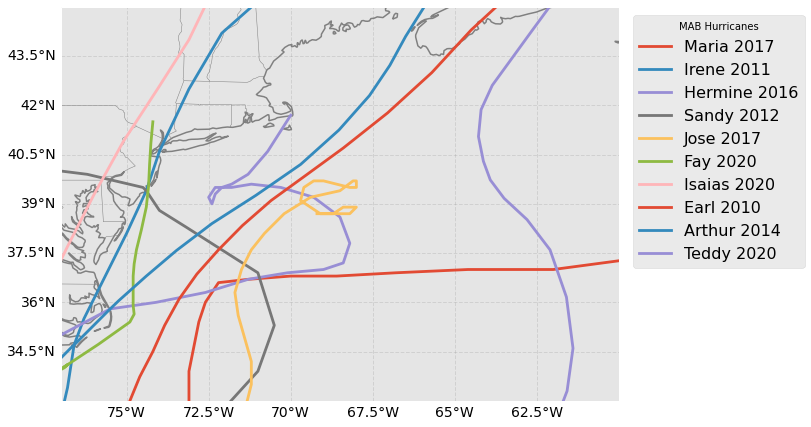

In [87]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='gray', linewidth=1.5)
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '50m', facecolor='none'))

for i, tf in enumerate(trackfiles):
    df = pd.read_csv(tf, skiprows=1)
    lats, lons = df.columns[4], df.columns[5]
    lat_plots = [float(df[lats][i][:-1]) for i in range(len(df[df.columns[0]]))]
    lon_plots = [-float(df[lons][i][:-1]) for i in range(len(df[df.columns[0]]))]
    ax.plot(lon_plots, lat_plots, label=trackfile_names[i])

clist = ["k", "y", "b", "g"]
for j, tr in enumerate(trkfiles):
    df = pd.read_csv(tr)
    ax.plot(df['LON'].values, df['LAT'].values, label=trkfiles_names[j]) #, c=clist[j])
    


ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines',
                                                      '50m', edgecolor='gray', facecolor='none'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
plt.ylim([33,45])
plt.xlim([-77, -60])
plt.legend(title='MAB Hurricanes', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig("rucool_MABhurricanes.png", bbox_inches='tight')